<span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">$$P^3$$</span>
===
 <center> <span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">robabilistic </span> <span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">recipitation </span><span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">rediction </span>  </center>
********

## Imports

In [16]:
%matplotlib inline
import os

import datetime as dt
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt

from IPython.display import display, HTML
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

## Directories

In [2]:
# Setup directories
CWD = os.getcwd()

DATA_DIR = CWD + "/data/"
CLEAN_DATA_DIR = DATA_DIR + "clean/"
OUT_DIR = CWD + "/output/"

## Preview Data

In [24]:
f = open(DATA_DIR+"eng-daily-01012016-12312016.csv", "r")
lines = f.readlines()
lines = lines[25:]
f.close()

f = open(CLEAN_DATA_DIR+"eng-daily-01012016-12312016.csv", "w+")
f.writelines(lines)
f.truncate()
f.close()

prev = pd.read_csv(CLEAN_DATA_DIR+"eng-daily-01012016-12312016.csv")
# display(prev)

## Build Training Set

In [3]:
def clean_data(in_dir, out_dir, filename):
    """
    
    """
    f = open(in_dir+filename, "r")
    lines = f.readlines()
    lines = lines[25:]
    f.close()

    f = open(out_dir+filename, "w+")
    f.writelines(lines)
    f.truncate()
    f.close()

Use the first 44 of 64 years of the data as the training set (this is roughly 70%). Hold the most recent 30% as the tet set.

In [27]:
frames = []
DATE_SEP = 44 * 365

for filename in os.listdir(DATA_DIR):
    if filename != "clean":
        clean_data(DATA_DIR, CLEAN_DATA_DIR, filename) 
        frames.append(pd.read_csv(CLEAN_DATA_DIR+filename))

data = pd.concat(frames)
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format="%Y-%m-%d")
data.sort_values("Date/Time", ascending=True, inplace=True)
train_data = data[0:DATE_SEP]
test_data = data[DATE_SEP:]
display(train_data)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1953-01-01,1953,1,1,NaN,0.6,NaN,-6.7,NaN,-3.1,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
1,1953-01-02,1953,1,2,NaN,1.7,NaN,-1.1,NaN,0.3,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
2,1953-01-03,1953,1,3,NaN,1.7,NaN,-2.2,NaN,-0.3,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
3,1953-01-04,1953,1,4,NaN,-2.2,NaN,-11.7,NaN,-7.0,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
4,1953-01-05,1953,1,5,NaN,-1.1,NaN,-6.7,NaN,-3.9,...,0.5,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1953-01-06,1953,1,6,NaN,-5.6,NaN,-11.7,NaN,-8.7,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
6,1953-01-07,1953,1,7,NaN,-10.0,NaN,-15.6,NaN,-12.8,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
7,1953-01-08,1953,1,8,NaN,-5.6,NaN,-12.8,NaN,-9.2,...,7.6,NaN,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1953-01-09,1953,1,9,NaN,-2.8,NaN,-10.6,NaN,-6.7,...,0.0,NaN,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
9,1953-01-10,1953,1,10,NaN,1.1,NaN,-3.9,NaN,-1.4,...,5.1,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

### Plot the Series

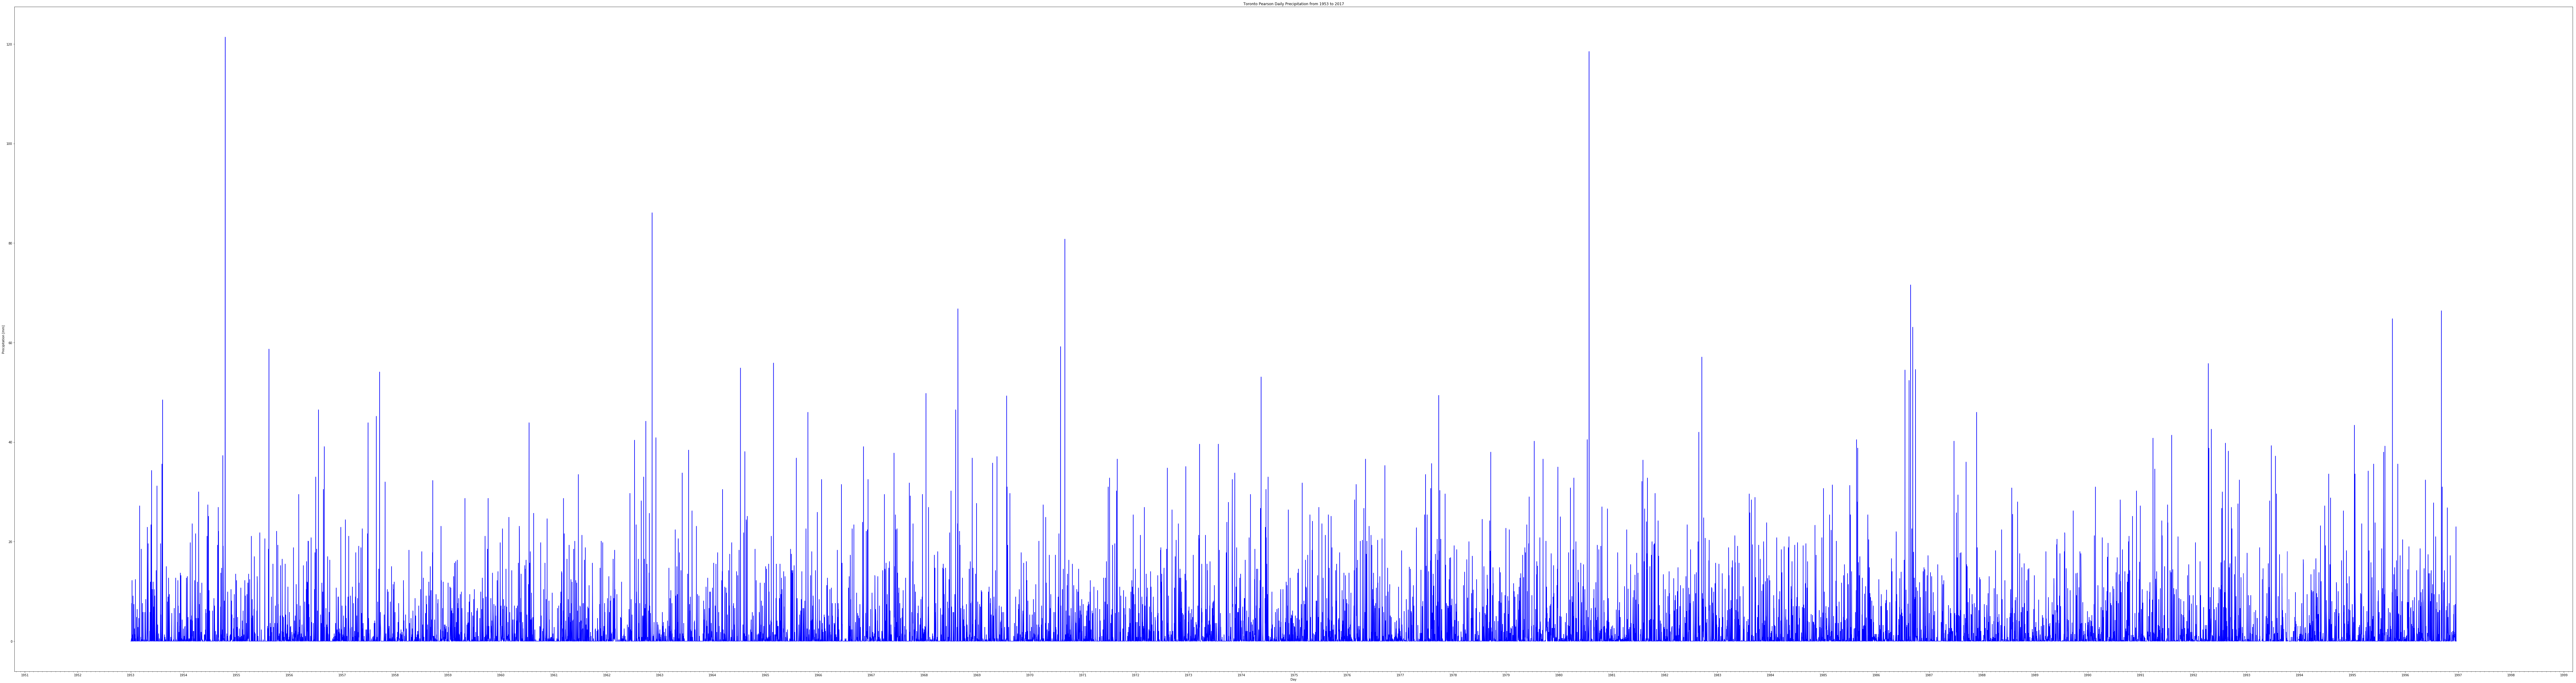

In [28]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(150, 40))
ax.plot_date(train_data["Date/Time"], train_data["Total Precip (mm)"], fmt='b-')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.ylabel("Precipitation [mm]")
plt.xlabel("Day")
plt.title("Toronto Pearson Daily Precipitation from 1953 to 2017")
plt.savefig(OUT_DIR + "raw_data.png")

### Descriptive Statistics

In [56]:
print(train_data.ix[:, 4:].describe(include=[np.number])) # Exclude Year, Month and Day, only include numbers

       Max Temp (°C)  Max Temp Flag  Min Temp (°C)  Min Temp Flag  \
count   16000.000000            0.0   16000.000000            0.0   
mean       12.517050            NaN       2.310563            NaN   
std        11.569048            NaN      10.099816            NaN   
min       -21.000000            NaN     -31.300000            NaN   
25%         2.800000            NaN      -4.400000            NaN   
50%        13.000000            NaN       2.400000            NaN   
75%        22.800000            NaN      10.600000            NaN   
max        37.600000            NaN      24.400000            NaN   

       Mean Temp (°C)  Mean Temp Flag  Heat Deg Days (°C)  Heat Deg Days Flag  \
count    16000.000000             0.0        16000.000000                 0.0   
mean         7.425019             NaN           11.258156                 NaN   
std         10.676333             NaN            9.777644                 NaN   
min        -24.700000             NaN            0.000

There are a few numeric columns full of NaNs (all the flags). Average total rain is pretty small. Average max temp is 12.5 degrees Celsius, Canada is cold.

### Yearly Plots